In [73]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Liberation Serif'

import logging
import pickle
from datetime import datetime
import os
from data_processing import gen_ckpt_steps
from conv_plots_funcs import get_seg_starts_per_config
import torch
import gc
from core.config import Config
from data_train import set_config_params, gen_ckpt_pred_steps

In [8]:
config = Config()
model_name = "ortho_haar_medium_single_gpu"

output_dir, ckpt_dir, experiment_name = set_config_params(config, model_name)

datasource = "val"


colors = ['#000000', '#005CAB', '#E31B23', '#FFC325', '#00A651', '#9B59B6']



ORTHO HAAR MEDIUM MODEL 1 GPU




In [9]:
ckpt_steps = gen_ckpt_pred_steps(model_name)

count = 0

datasources = ["val", "train"]
tf_avg_cong = []
tf_std_cong = []
zero_quartiles_cong = []
train_exs_cong = []
for datasource in datasources:
    train_exs = []
    tf_avg_lst = []
    tf_std_lst = []

    for ckpt in np.arange(1000, 182000, 1000):

        train_ex = ckpt*len(config.devices)*config.batch_size

        path = f"{output_dir}/prediction_errors{config.C_dist}_step={ckpt}.ckpt/train_conv_mult_cut_{datasource}_ortho_haar_state_dim_5_err_lss_examples.pkl"

        try:
            with open(path, "rb") as f:
                data = pickle.load(f)
                tf_errs = data["MOP"][0]
                zero_errs = data["Zero"][0]

                print(f"tf_errs.shape: {tf_errs.shape}")
                print(f"zero_errs.shape: {zero_errs.shape}")

                #set all np.inf to 0 in tf_errs and zero_errs
                tf_errs[np.isinf(tf_errs)] = 0
                zero_errs[np.isinf(zero_errs)] = 0


        except FileNotFoundError:
            print(f"ckpt {ckpt} not found")
            continue

        print(f"\n\n\nckpt: {ckpt}")
        tf_errs_mean_trial = np.mean(tf_errs, axis=1)
        print(f"tf_errs_mean_trial.shape: {tf_errs_mean_trial.shape}")

        tf_errs_mean = np.mean(tf_errs_mean_trial, axis=0)
        print(f"tf_errs_mean.shape: {tf_errs_mean.shape}")

        tf_avg = np.mean(tf_errs_mean, axis=0)
        tf_std = np.std(tf_errs_mean, axis=0) / np.sqrt(tf_errs_mean.shape[0])

        tf_avg_lst.append(tf_avg)
        tf_std_lst.append(tf_std)
        train_exs.append(train_ex)

    tf_avg_cong.append(tf_avg_lst)
    tf_std_cong.append(tf_std_lst)
    train_exs_cong.append(train_exs)


len(full_range) 181
tf_errs.shape: (40000, 1, 251)
zero_errs.shape: (40000, 1, 251)



ckpt: 1000
tf_errs_mean_trial.shape: (40000, 251)
tf_errs_mean.shape: (251,)
tf_errs.shape: (40000, 1, 251)
zero_errs.shape: (40000, 1, 251)



ckpt: 2000
tf_errs_mean_trial.shape: (40000, 251)
tf_errs_mean.shape: (251,)
tf_errs.shape: (40000, 1, 251)
zero_errs.shape: (40000, 1, 251)



ckpt: 3000
tf_errs_mean_trial.shape: (40000, 251)
tf_errs_mean.shape: (251,)
tf_errs.shape: (40000, 1, 251)
zero_errs.shape: (40000, 1, 251)



ckpt: 4000
tf_errs_mean_trial.shape: (40000, 251)
tf_errs_mean.shape: (251,)
tf_errs.shape: (40000, 1, 251)
zero_errs.shape: (40000, 1, 251)



ckpt: 5000
tf_errs_mean_trial.shape: (40000, 251)
tf_errs_mean.shape: (251,)
tf_errs.shape: (40000, 1, 251)
zero_errs.shape: (40000, 1, 251)



ckpt: 6000
tf_errs_mean_trial.shape: (40000, 251)
tf_errs_mean.shape: (251,)
tf_errs.shape: (40000, 1, 251)
zero_errs.shape: (40000, 1, 251)



ckpt: 7000
tf_errs_mean_trial.shape: (40000, 251)

len(tf_avg_cong): 2
tf_avg_lst: [np.float32(0.8576908), np.float32(0.610651), np.float32(0.43618417), np.float32(0.37325677), np.float32(0.29719743), np.float32(0.22293441), np.float32(0.16941153), np.float32(0.14143859), np.float32(0.111546196), np.float32(0.09492113), np.float32(0.10004008), np.float32(0.09024144), np.float32(0.08409727), np.float32(0.07274471), np.float32(0.07113784), np.float32(0.07964536), np.float32(0.07585076), np.float32(0.066627525), np.float32(0.0737089), np.float32(0.072272785), np.float32(0.062193263), np.float32(0.06936758), np.float32(0.059287794), np.float32(0.06787846), np.float32(0.057668246), np.float32(0.06544418), np.float32(0.060207687), np.float32(0.051474158), np.float32(0.050878916), np.float32(0.050917126), np.float32(0.059157696), np.float32(0.05851223), np.float32(0.05844231), np.float32(0.050111633), np.float32(0.05813331), np.float32(0.05009076), np.float32(0.058197506), np.float32(0.05835416), np.float32(0.05918013), np.float32(0.051445212

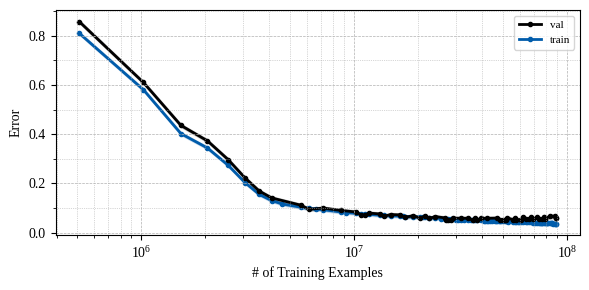

In [10]:
fig,ax = plt.subplots(1, 1, figsize=(6, 3))
count = 0

print(f"len(tf_avg_cong): {len(tf_avg_cong)}")
for tf_avg_lst, tf_std_lst, train_exs in zip(tf_avg_cong, tf_std_cong, train_exs_cong):
    tf_avg_arr = np.array(tf_avg_lst)
    tf_std_arr = np.array(tf_std_lst)
    train_exs_arr = np.array(train_exs)
    print(f"tf_avg_lst: {tf_avg_lst}")
    ax.plot(train_exs_arr, tf_avg_arr, color=colors[count], linewidth=2, label=datasources[count], marker="o", markersize=3, zorder=1-count)
    ax.fill_between(train_exs_arr, tf_avg_arr - tf_std_arr, tf_avg_arr + tf_std_arr, color=colors[count], alpha=0.2, zorder=0)
    count += 1


ax.set_ylabel("Error")
ax.set_xlabel("# of Training Examples")
# ax.set_yscale("log")
ax.set_xscale("log")
ax.legend(loc="upper right", fontsize=8)
#set minor yticks every 0.01
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
#set gridlines
ax.grid(which='major', linestyle='--', linewidth=0.5)
ax.grid(which='minor', linestyle=':', linewidth=0.5)


fig.tight_layout()
time = datetime.now().strftime("%Y-%m-%d_%H")
fig_path = f"{output_dir}/figures/multi_cut/pretrain_loss/{model_name}_train_val_loss_cong_{time}.pdf"

os.makedirs(os.path.dirname(fig_path), exist_ok=True)
plt.savefig(fig_path, format='pdf')

In [3]:
#import zipf distribution from scipy
from scipy.stats import zipfian

In [11]:
#expectation of zipfian (k,n)
a = 1.5
n = 25

m = zipfian.mean(a, n)
print("Mean of Zipfian(1.5,25) = ", m)

avg_k = m

f6_err = (1 + 1 + 0.8 + 0.6 + 0.4 + 0.2)
print(f"f6_err: {f6_err}")

est_low_bound = avg_k*f6_err/(251)
print(f"est_low_bound: {est_low_bound}")

Mean of Zipfian(1.5,25) =  3.8980166787247157
f6_err: 4.0
est_low_bound: 0.06211978770876041


len(tf_avg_cong): 2
tf_avg_lst: [np.float32(0.8576908), np.float32(0.610651), np.float32(0.43618417), np.float32(0.37325677), np.float32(0.29719743), np.float32(0.22293441), np.float32(0.16941153), np.float32(0.14143859), np.float32(0.111546196), np.float32(0.09492113), np.float32(0.10004008), np.float32(0.09024144), np.float32(0.08409727), np.float32(0.07274471), np.float32(0.07113784), np.float32(0.07964536), np.float32(0.07585076), np.float32(0.066627525), np.float32(0.0737089), np.float32(0.072272785), np.float32(0.062193263), np.float32(0.06936758), np.float32(0.059287794), np.float32(0.06787846), np.float32(0.057668246), np.float32(0.06544418), np.float32(0.060207687), np.float32(0.051474158), np.float32(0.050878916), np.float32(0.050917126), np.float32(0.059157696), np.float32(0.05851223), np.float32(0.05844231), np.float32(0.050111633), np.float32(0.05813331), np.float32(0.05009076), np.float32(0.058197506), np.float32(0.05835416), np.float32(0.05918013), np.float32(0.051445212

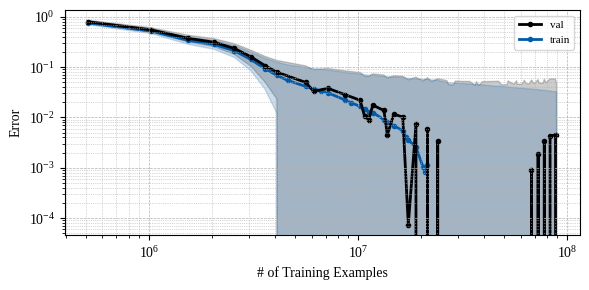

In [12]:
fig,ax = plt.subplots(1, 1, figsize=(6, 3))
count = 0

print(f"len(tf_avg_cong): {len(tf_avg_cong)}")
for tf_avg_lst, tf_std_lst, train_exs in zip(tf_avg_cong, tf_std_cong, train_exs_cong):
    tf_avg_arr = np.array(tf_avg_lst) - est_low_bound
    tf_std_arr = np.array(tf_std_lst) - est_low_bound
    train_exs_arr = np.array(train_exs)
    print(f"tf_avg_lst: {tf_avg_lst}")
    ax.plot(train_exs_arr, tf_avg_arr, color=colors[count], linewidth=2, label=datasources[count], marker="o", markersize=3, zorder=1-count)
    ax.fill_between(train_exs_arr, tf_avg_arr - tf_std_arr, tf_avg_arr + tf_std_arr, color=colors[count], alpha=0.2, zorder=0)
    count += 1


ax.set_ylabel("Error")
ax.set_xlabel("# of Training Examples")
ax.set_yscale("log")
ax.set_xscale("log")
ax.legend(loc="upper right", fontsize=8)
#set minor yticks every 0.01
# ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
#set gridlines
ax.grid(which='major', linestyle='--', linewidth=0.5)
ax.grid(which='minor', linestyle=':', linewidth=0.5)


fig.tight_layout()
time = datetime.now().strftime("%Y-%m-%d_%H")
fig_path = f"{output_dir}/figures/multi_cut/pretrain_loss/{model_name}_train_val_loss_cong_log_{time}.pdf"

os.makedirs(os.path.dirname(fig_path), exist_ok=True)
plt.savefig(fig_path, format='pdf')

## Pseudoinv baseline for init segs

In [74]:
#load data from /data/shared/ICL_Kalman_Experiments/train_and_test_data/ortho_haar/val_interleaved_traces_ortho_haar_ident_C_multi_cut.pkl

with open("/data/shared/ICL_Kalman_Experiments/train_and_test_data/ortho_haar/val_interleaved_traces_ortho_haar_ident_C_multi_cut.pkl", "rb") as f:
    data = pickle.load(f)
    print(f"data.keys(): {data.keys()}")
    multi_sys_ys = data["multi_sys_ys"][0]
    multi_sys_ys = np.take(multi_sys_ys, np.arange(multi_sys_ys.shape[-1] - config.ny, multi_sys_ys.shape[-1]), axis=-1) #get the true test observations
    
    sys_choices_per_config = data["sys_choices_per_config"][0]
    seg_starts_per_config = data["seg_starts_per_config"][0]
    sys_inds_per_config = data["sys_inds_per_config"][0]
    real_seg_lens_per_config = data["real_seg_lens_per_config"][0]
    sys_dict_per_config = data["sys_dict_per_config"][0]

    print(f"multi_sys_ys.shape: {multi_sys_ys.shape}")
    print(f"len(sys_choices_per_config): {len(sys_choices_per_config)}")
    print(f"len(seg_starts_per_config): {len(seg_starts_per_config)}")
    print(f"len(sys_inds_per_config): {len(sys_inds_per_config)}")
    print(f"len(real_seg_lens_per_config): {len(real_seg_lens_per_config)}")

data.keys(): dict_keys(['multi_sys_ys', 'sys_choices_per_config', 'sys_dict_per_config', 'tok_seg_lens_per_config', 'seg_starts_per_config', 'real_seg_lens_per_config', 'sys_inds_per_config'])
multi_sys_ys.shape: (40000, 1, 251, 5)
len(sys_choices_per_config): 40000
len(seg_starts_per_config): 40000
len(sys_inds_per_config): 40000
len(real_seg_lens_per_config): 40000


In [75]:
print(f"sys_choices_per_config[0][0]: {sys_choices_per_config[0][0]}")
print(f"sys_inds_per_config[0][0]: {sys_inds_per_config[0][0]}")
print(f"sys_dict_per_config[0]: {sys_dict_per_config[0]}")

sys_choices_per_config[0][0]: 14350
sys_inds_per_config[0][0]: 14350
sys_dict_per_config[0]: {14350: np.int64(22)}


In [76]:
conf = 0

pred_conf = np.zeros_like(multi_sys_ys[conf])
print(f"pred_conf.shape: {pred_conf.shape}")

sys_init_ind_dict = {} # a dictionary that holds the system indices and how many initial indices have been seen for the config

sys_appear = [] #holds the system indices that appear in the config

seg_count = 0
for seg in seg_starts_per_config[conf]:
    
    current_sys = sys_choices_per_config[conf][seg_count]
    if current_sys not in sys_appear: # if the system has not appeared before
        sys_init_ind_dict[current_sys] = real_seg_lens_per_config[conf][seg_count] # add the system to the dictionary with size of the segment
        sys_appear.append(current_sys) #append the system to the list of systems that have appeared

        start_ind = seg + 1
    elif sys_init_ind_dict[current_sys] < 6: # still need to see 6 examples of the system
        continue
    else: # have already seen 6 examples of the system
        continue

pred_conf.shape: (1, 251, 5)


In [77]:
from linalg_helpers import print_matrix

In [78]:
def pseudo_prediction(history):

    print_matrix(history, "history")
    inds = history.shape[0]
    print(f"inds: {inds}")

    leftmat = history[:, 1:inds-1]
    print(f"leftmat.shape: {leftmat.shape}")
    print_matrix(leftmat, "leftmat")
    rightmat = history[:, 0:inds-2]
    print(f"rightmat.shape: {rightmat.shape}")
    print_matrix(rightmat, "rightmat")

    Uhat = leftmat @ np.linalg.pinv(rightmat)
    print(f"Uhat.shape: {Uhat.shape}")

    pred = Uhat @ history[:,-1]
    print(f"pred.shape: {pred.shape}")
    return pred

In [79]:
ys_ind = 5
hist = multi_sys_ys[conf][0, 2:ys_ind-1, :].T
print(f"hist.shape: {hist.shape}")
pred = pseudo_prediction(hist)
print(f"pred: {pred}")

print(f"multi_sys_ys[conf][0,{ys_ind},:]: {multi_sys_ys[conf][0,ys_ind,:]}")

hist.shape: (5, 2)
Matrix history:
   -0.4923    -0.2920 
    0.7638    -0.1727 
   -0.1546     1.1917 
    0.4555    -0.1543 
   -0.7915     0.3531 
inds: 5
leftmat.shape: (5, 1)
Matrix leftmat:
   -0.2920 
   -0.1727 
    1.1917 
   -0.1543 
    0.3531 
rightmat.shape: (5, 2)
Matrix rightmat:
   -0.4923    -0.2920 
    0.7638    -0.1727 
   -0.1546     1.1917 
    0.4555    -0.1543 
   -0.7915     0.3531 


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 1)